In [1]:
import tensorflow
physical_devices = tensorflow.config.list_physical_devices('GPU')
tensorflow.config.experimental.set_memory_growth(physical_devices[0], True)

## Dogs vs Cats Image Classification - AlexNet

In [2]:
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))
classes = 2
img_width, img_height, img_channels = 224, 224, 3
input_shape = (img_width, img_height, img_channels)

Num GPUs Available:  1


In [3]:
from utilities import get_train_val_iterator
train_iterator, val_iterator = get_train_val_iterator( 
    input_shape, 
    "datasets//dogs-vs-cats//train",
    "datasets//dogs-vs-cats//val",
    batch_size = 64
)

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


### AlexNet Sequential API 

In [4]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential(name="AlexNet_basic")

# 1 Convolution Layer
model.add( Conv2D( 96, kernel_size=(11,11), padding="SAME", strides=(4,4),
        activation="relu", input_shape=(224, 224, 3 ) ))
model.add( MaxPooling2D( pool_size=(3,3), strides=(2,2) ))

# 2 Convolution Layer
model.add( Conv2D(256, kernel_size=(5,5), strides = 1, activation="relu", padding="SAME" ) )
model.add( MaxPooling2D( pool_size=(3,3), strides=(2,2) ))

# 3 Convolution Layer
model.add( Conv2D(384, kernel_size=(3,3), strides = 1, activation="relu", padding="SAME" ) )
model.add( Conv2D(384, kernel_size=(3,3), strides = 1, activation="relu", padding="SAME" ) )
model.add( Conv2D(256, kernel_size=(3,3), strides = 1, activation="relu", padding="SAME" ) )
model.add( MaxPooling2D( pool_size=(3,3), strides=(2,2) ))

# Dense Layers
model.add( Flatten() )
model.add( Dense( 4096, activation='relu' ) )
model.add( Dense( 4096, activation='relu' ) )

# Output
model.add( Dense( classes, activation='softmax' ) )
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "AlexNet_basic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)     

In [5]:
earlyStopping = tensorflow.keras.callbacks.EarlyStopping(
                    monitor='val_loss', patience=5, verbose=1 )

history = model.fit_generator(
    generator = train_iterator, 
    steps_per_epoch = len(train_iterator), 
    validation_data = val_iterator, 
    validation_steps = len(val_iterator), 
    epochs = 500,
    callbacks = [ earlyStopping ]
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 293 steps, validate for 99 steps
Epoch 1/500
293/293 [==============================] - 78s 265ms/step - loss: 0.6889 - accuracy: 0.5457 - val_loss: 0.6821 - val_accuracy: 0.5754
Epoch 2/500
293/293 [==============================] - 60s 205ms/step - loss: 0.6783 - accuracy: 0.5781 - val_loss: 0.7199 - val_accuracy: 0.5040
Epoch 3/500
293/293 [==============================] - 60s 206ms/step - loss: 0.6691 - accuracy: 0.5919 - val_loss: 0.6538 - val_accuracy: 0.6365
Epoch 4/500
293/293 [==============================] - 60s 206ms/step - loss: 0.6522 - accuracy: 0.6230 - val_loss: 0.6425 - val_accuracy: 0.6359
Epoch 5/500
293/293 [==============================] - 61s 209ms/step - loss: 0.6112 - accuracy: 0.6682 - val_loss: 0.5794 - val_accuracy: 0.7003
Epoch 6/500
293/293 [==============================] - 61s 207ms/step - loss: 0.5693 - accuracy: 0.70

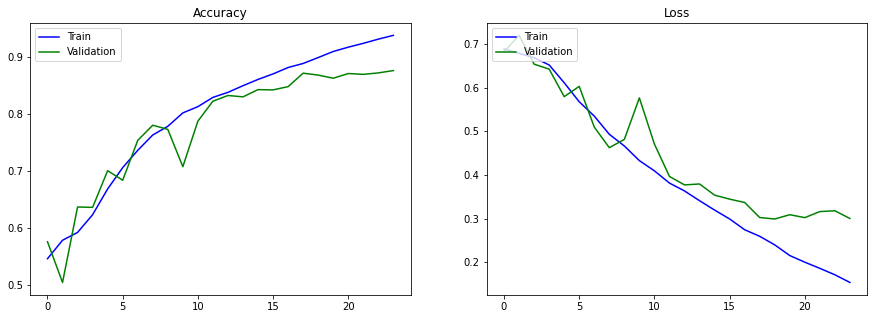

In [6]:
from utilities import plot_training_history
plot_training_history(history)

In [7]:
# Save model
save_path = "saved_models\\" + model.name + ".h5"
model.save( save_path )

#### Validation Accuracy: 87.61%
#### Validation Loss: 0.1535